## House Price Prediction Assignment

### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

  - Which variables are significant in predicting the price of a house, and

  - How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

 

Business Goal 

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Importing Necessary Libraries

In [178]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

import warnings
warnings.filterwarnings('ignore')

## Data Loading

Loading the data into the data frame

In [179]:
housedata=pd.read_csv("train.csv")

In [180]:
#Check whether there is any headers or summery details rows
housedata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [181]:
housedata.shape

(1460, 81)

In [182]:
#Check whether there is any footers or summery details rows
housedata.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [183]:
housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [184]:
# Cout of data types
housedata.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

In [185]:
housedata.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Observation

- The dataset has 81 columns and 1460 rows
- Sale Price is the target variable.
- Few columns can be dropped which are not meaningful. e.g. Id
- Below columns has NA values but as per data dictionary NA means some attribute of the house which is not available. Hence, we can replace these values with "None". "Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"

## Step 2: Data Cleaning

In [186]:
#Drop Id column
housedata.drop(["Id"],  axis=1, inplace=True)

In [187]:
housedata.shape

(1460, 80)

## Step 3: Missing Value Treatment

In [188]:
#Calculate missing value %
total = housedata.isnull().sum().sort_values(ascending=False)
pct = (housedata.isnull().sum()/len(housedata)*100).sort_values(ascending = False)
missing_null_pct = pd.concat([total, pct], axis=1, keys=['Total', 'Percent'])
missing_null_pct.head(10)

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945


In [189]:
# House attrbutes where NA has certain meaning and replace them with None. "Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"
NA_Values = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in NA_Values:
    housedata[i].fillna("None", inplace=True)
    
housedata.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [190]:
#Calculate missing value %
total = housedata.isnull().sum().sort_values(ascending=False)
pct = (housedata.isnull().sum()/len(housedata)*100).sort_values(ascending = False)
missing_null_pct = pd.concat([total, pct], axis=1, keys=['Total', 'Percent'])
missing_null_pct.head(10)

,Total,Percent
MasVnrType,872,59.726027
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
MasVnrArea,8,0.547945
Electrical,1,0.068493
GrLivArea,0,0.000000
BsmtFullBath,0,0.000000
BsmtHalfBath,0,0.000000
FullBath,0,0.000000
HalfBath,0,0.000000


In [191]:
housedata.drop("MasVnrType", axis=1, inplace=True)

In [192]:
#Impute LotFrontage missing values with median
housedata['LotFrontage'].fillna(housedata['LotFrontage'].median(), inplace=True)

In [193]:
housedata['GarageYrBlt'].fillna(housedata['GarageYrBlt'].median(), inplace=True)

In [194]:
housedata["MasVnrArea"].fillna(housedata["MasVnrArea"].median(), inplace=True)

In [195]:
# Imputing Electrical column missing values with SBrkr
housedata.loc[pd.isnull(housedata['Electrical']), ['Electrical']] = 'SBrkr'

In [196]:
#Calculate missing value %
total = housedata.isnull().sum().sort_values(ascending=False)
pct = (housedata.isnull().sum()/len(housedata)*100).sort_values(ascending = False)
missing_null_pct = pd.concat([total, pct], axis=1, keys=['Total', 'Percent'])
missing_null_pct.head(10)

,Total,Percent
MSSubClass,0,0.0
KitchenAbvGr,0,0.0
GarageYrBlt,0,0.0
GarageType,0,0.0
FireplaceQu,0,0.0
Fireplaces,0,0.0
Functional,0,0.0
TotRmsAbvGrd,0,0.0
KitchenQual,0,0.0
BedroomAbvGr,0,0.0


### Check unique values in each column
​
Based on the count, we can determine whether the variables come under Categorial or Numerical. 

In [197]:
housedata.nunique()

MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 79, dtype: int64

## Step 4: Data Visualization

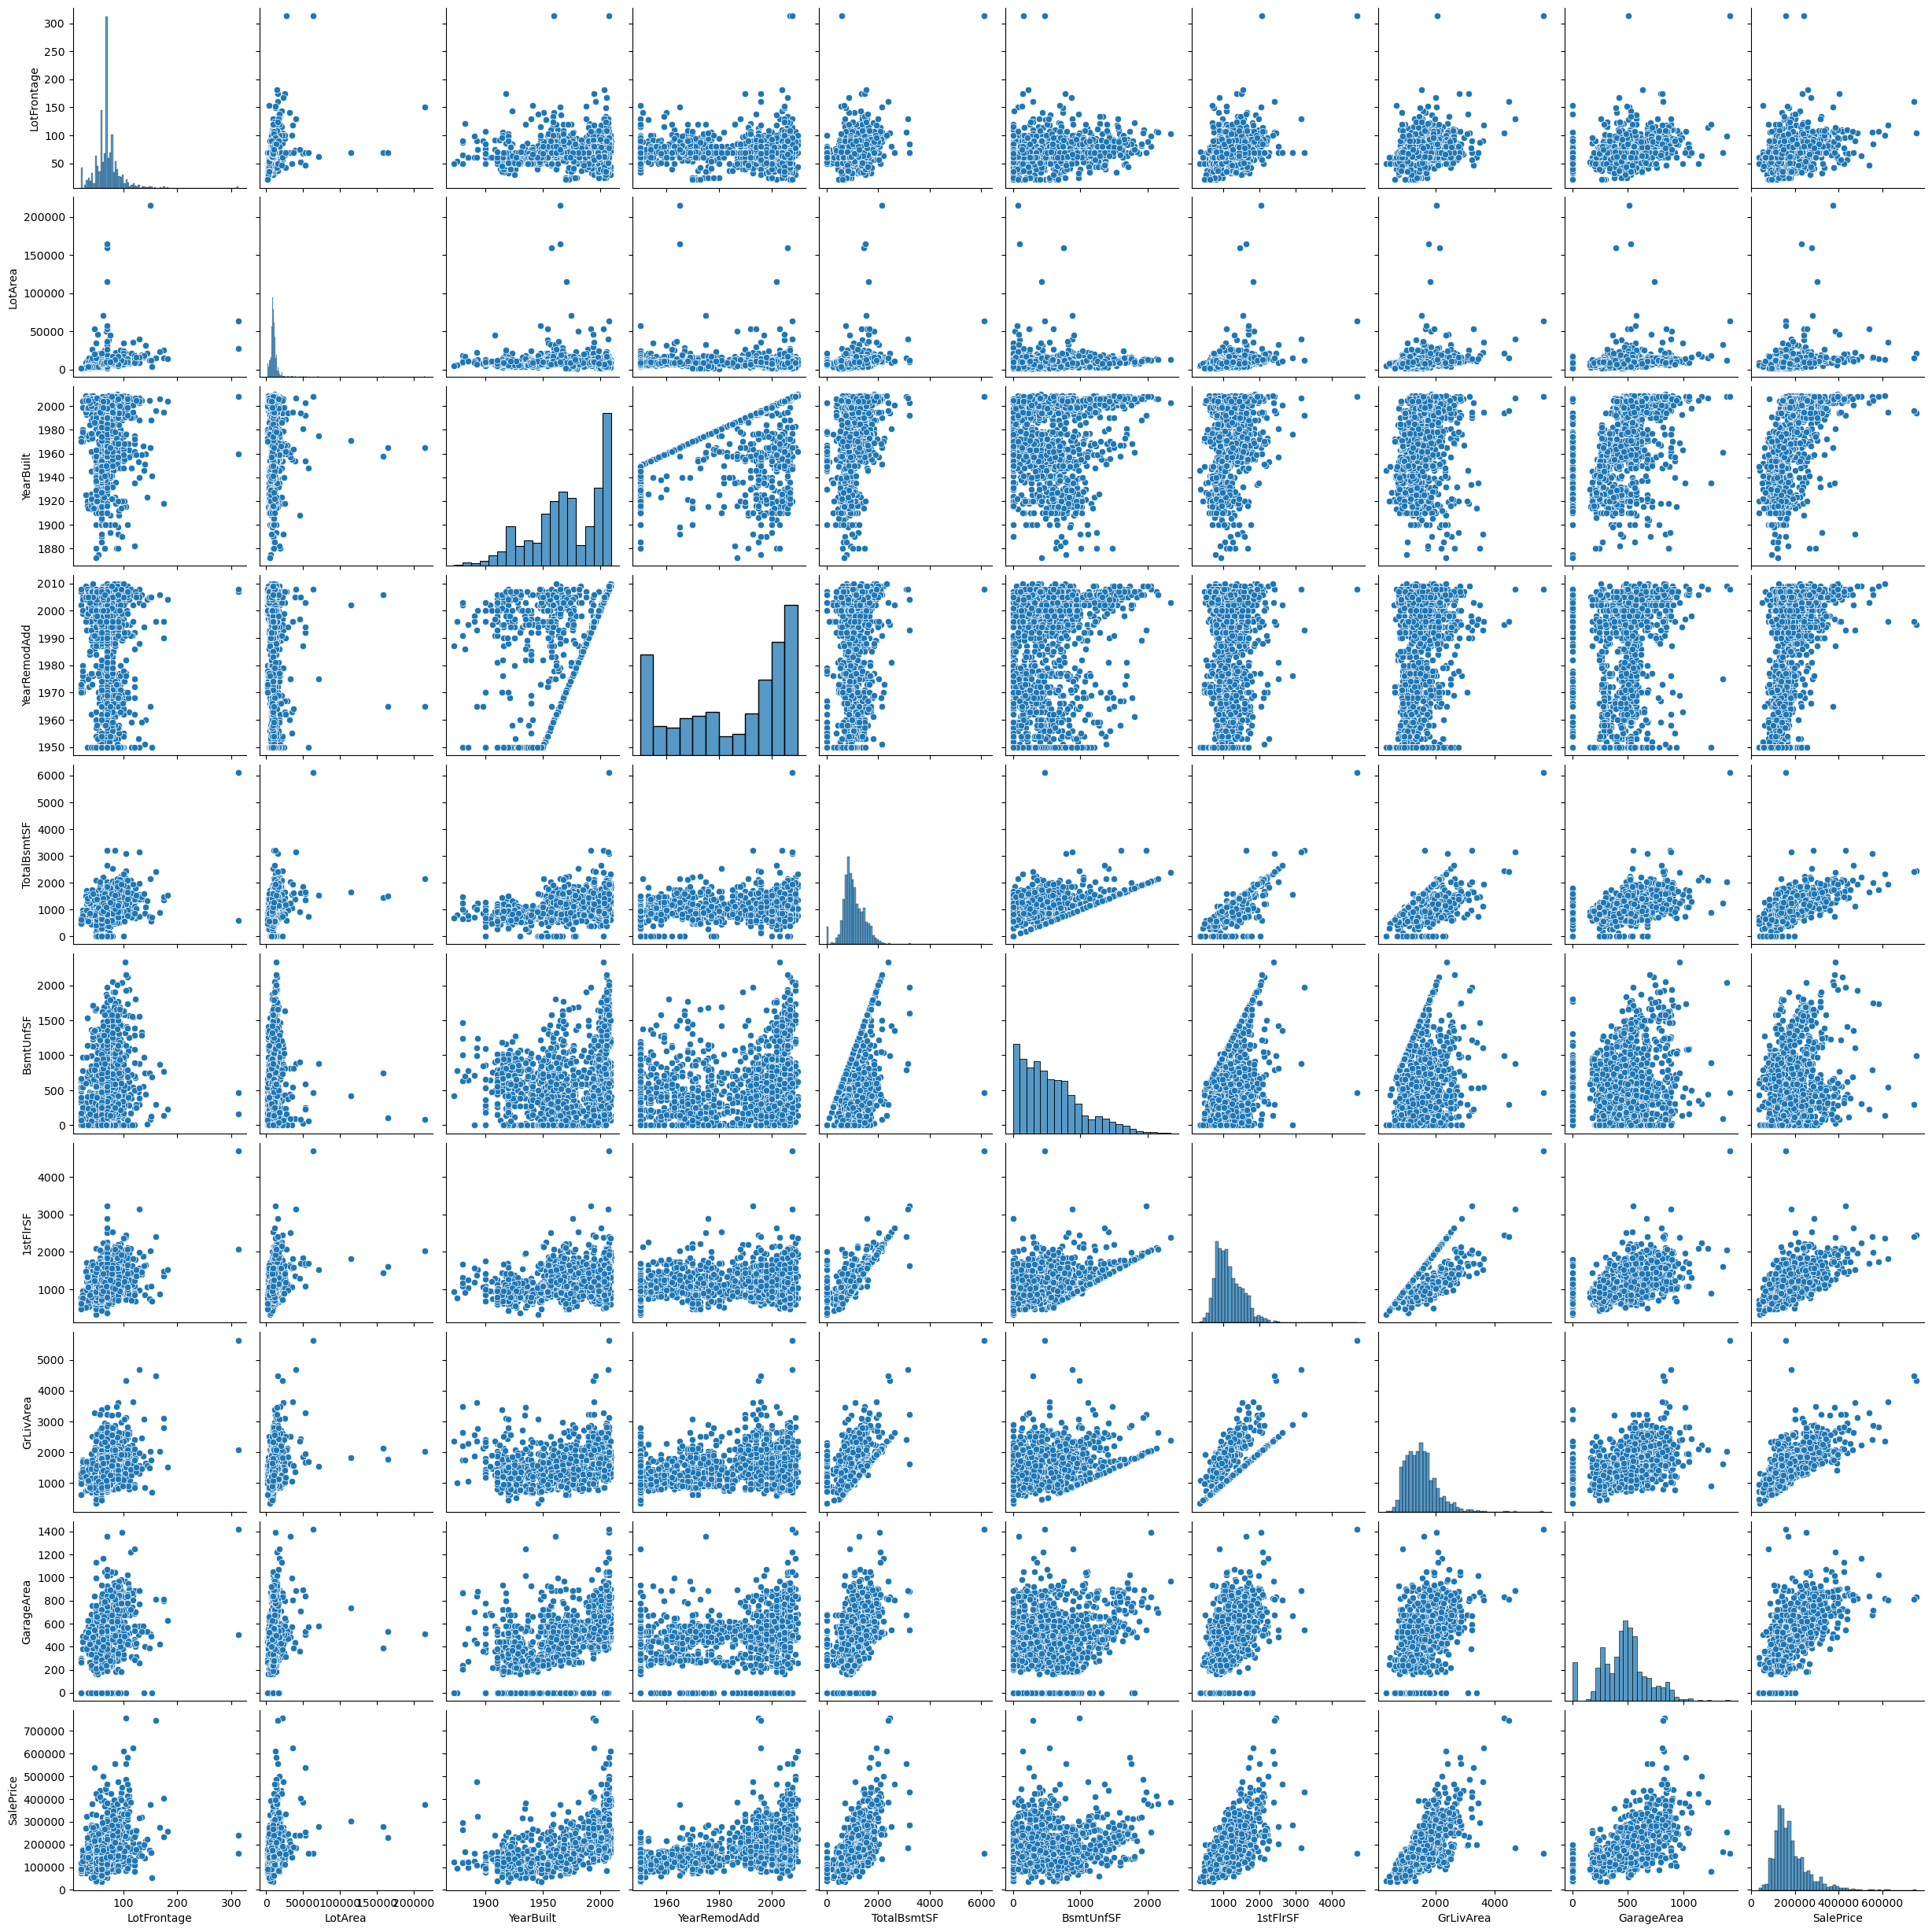

In [198]:
#Visualising the numerical variables
# housedata_num = housedata[['SalePrice', 'OverallQual', 'OverallCond','LotArea','GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']]
# sns.pairplot(housedata_num)
# plt.show()

housedata_num = housedata[['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'BsmtUnfSF', '1stFlrSF', 
    'GrLivArea', 'GarageArea', 'SalePrice']]
# housedata_num = housedata[['SalePrice', 'OverallQual', 'OverallCond','LotArea','GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']]
sns.pairplot(housedata_num)
plt.show()

#### Observation

- SalePrice and TotalBsmtSF shows linear relationship
- SalePrice and 1stFirSF shows linear relationship
- SalePrice and GrLivArea shows linear relationship
- GrLivArea and TotalBsmtSF shows linear relationship
- GrLivArea and 1stFirSF shows linear relationship

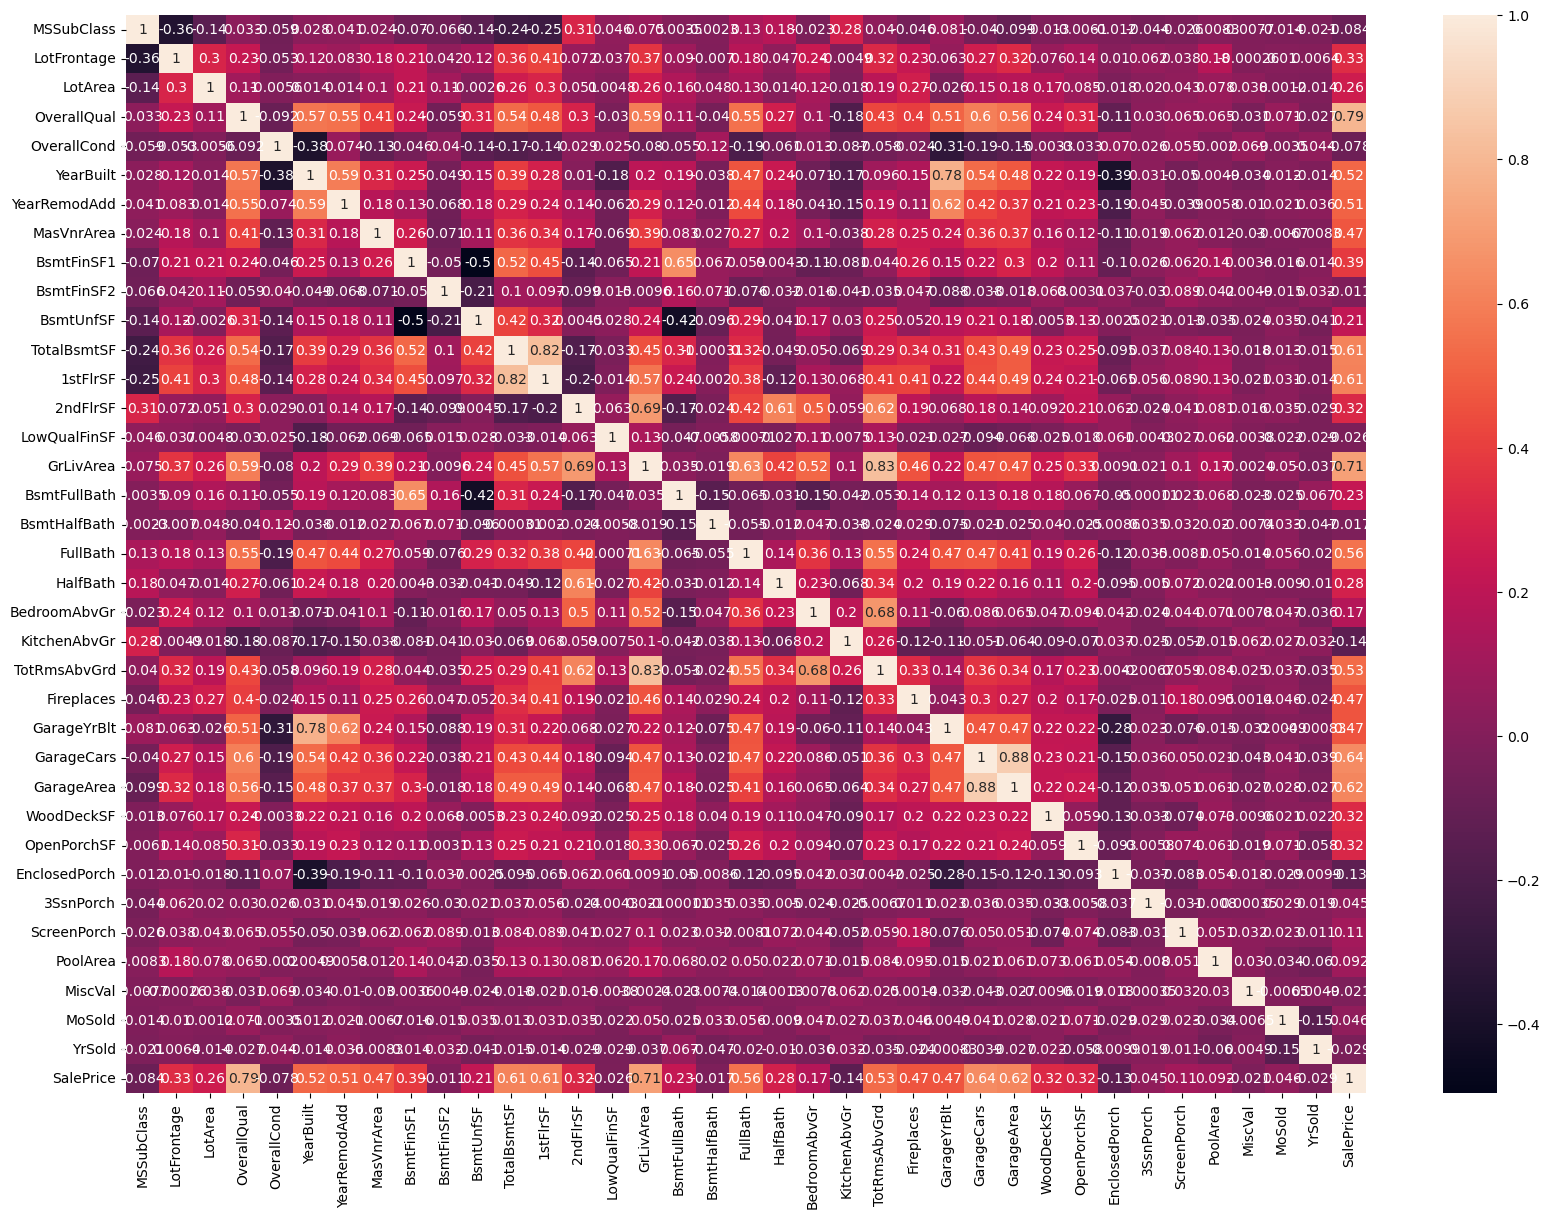

In [199]:
#Plot correlations on heatmap
numeric_data = housedata.select_dtypes(include=[np.number])
plt.figure(figsize=(20, 14))
sns.heatmap(numeric_data.corr(), annot=True)
plt.show()

#### Observation

- YearBuilt and GarageYrBlt are highly collinear hence one of them can be dropped.
- SalePrice is highly correlated positively with OverallQual, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, TotalBsmtSF, GrLivArea, FullBath, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF and OpenPorchSF. Hence these can be good predictors.
- Saleprice is negatively correlated with KitchenAbvGr and EncosedPorch. So these also can also be good predictors.


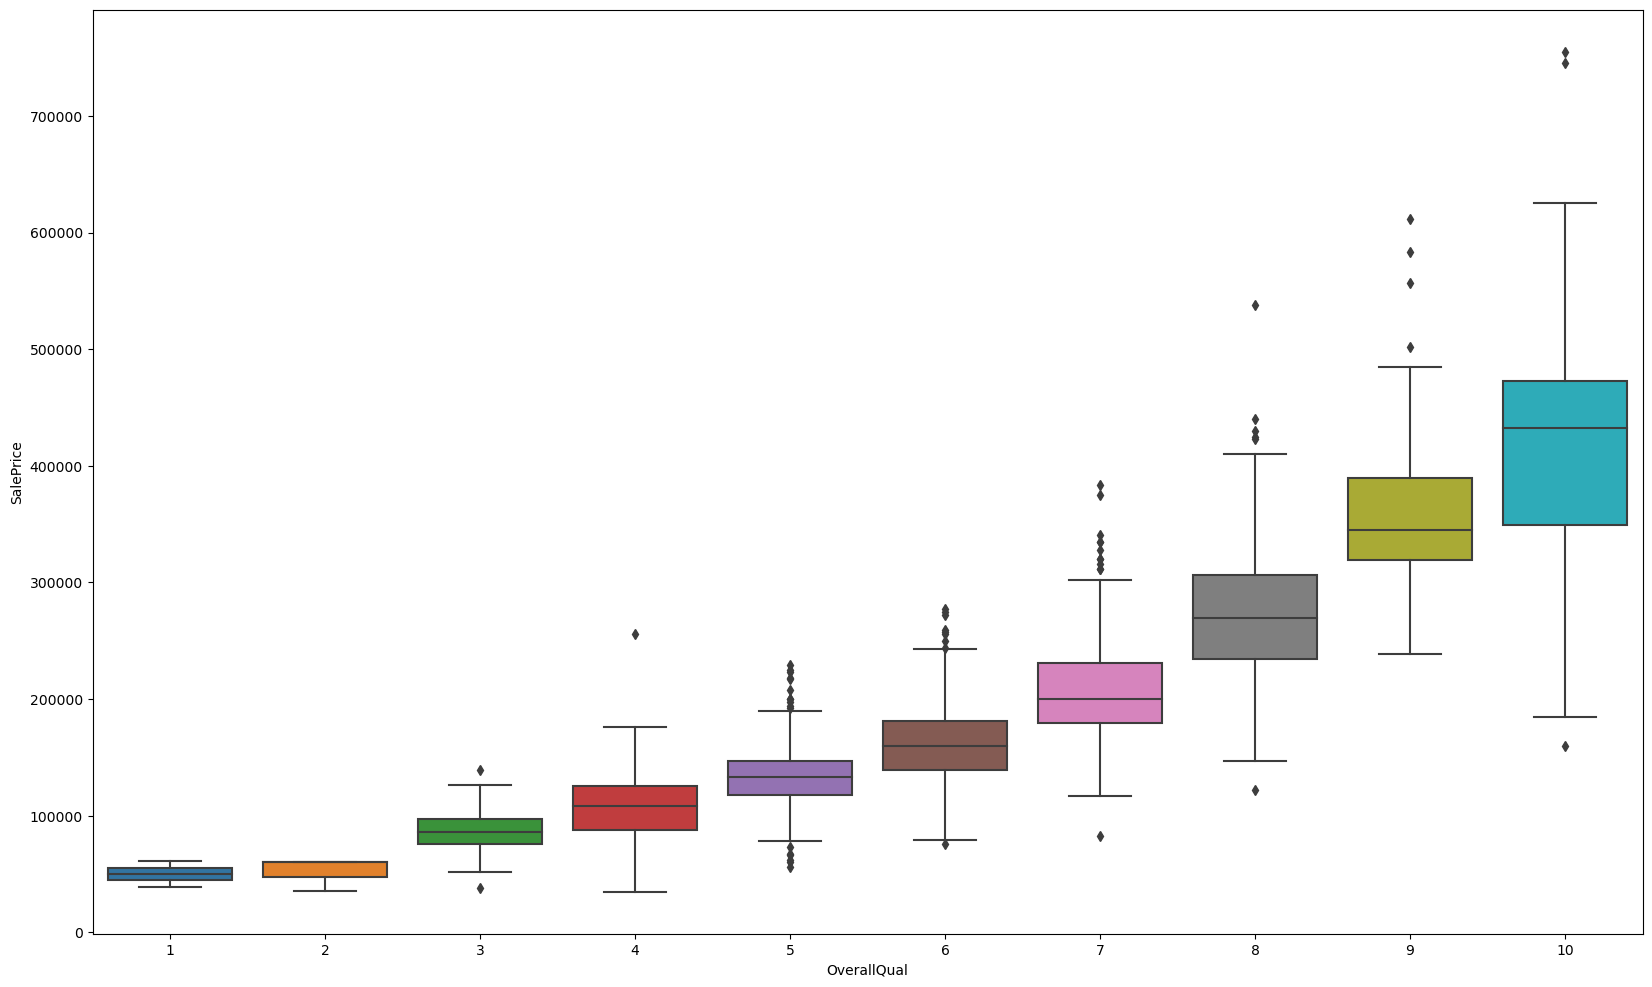

In [200]:
plt.figure(figsize=(20, 12))
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = housedata)
plt.show()

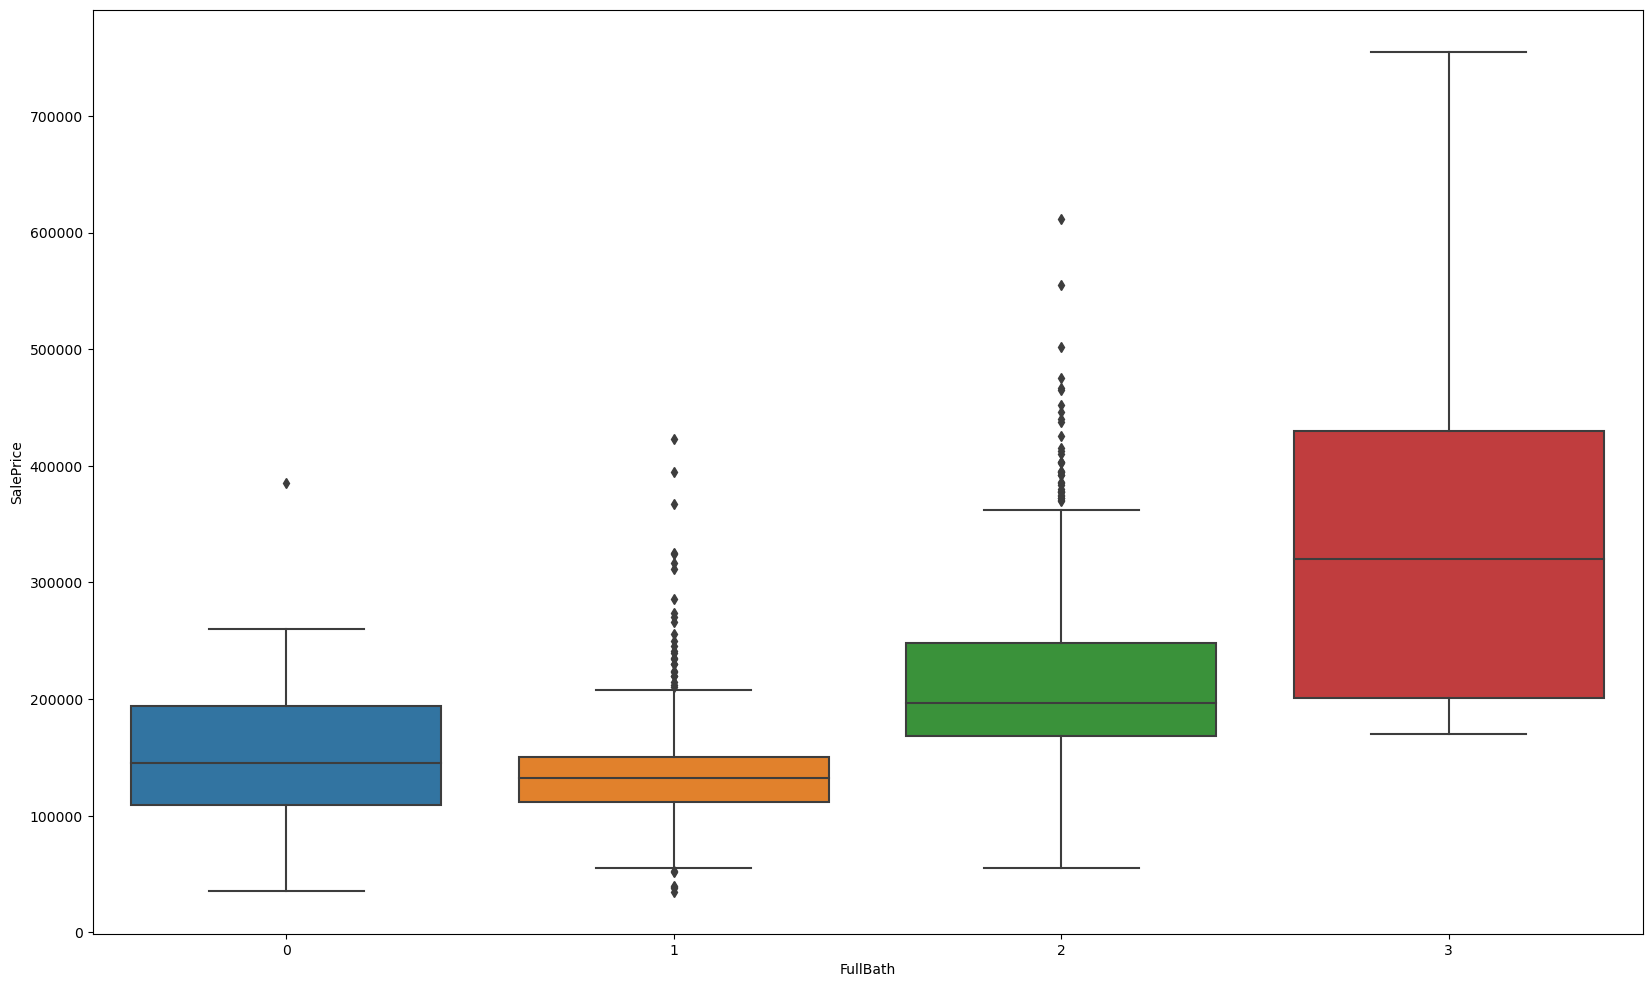

In [201]:
plt.figure(figsize=(20, 12))
sns.boxplot(x = 'FullBath', y = 'SalePrice', data = housedata)
plt.show()

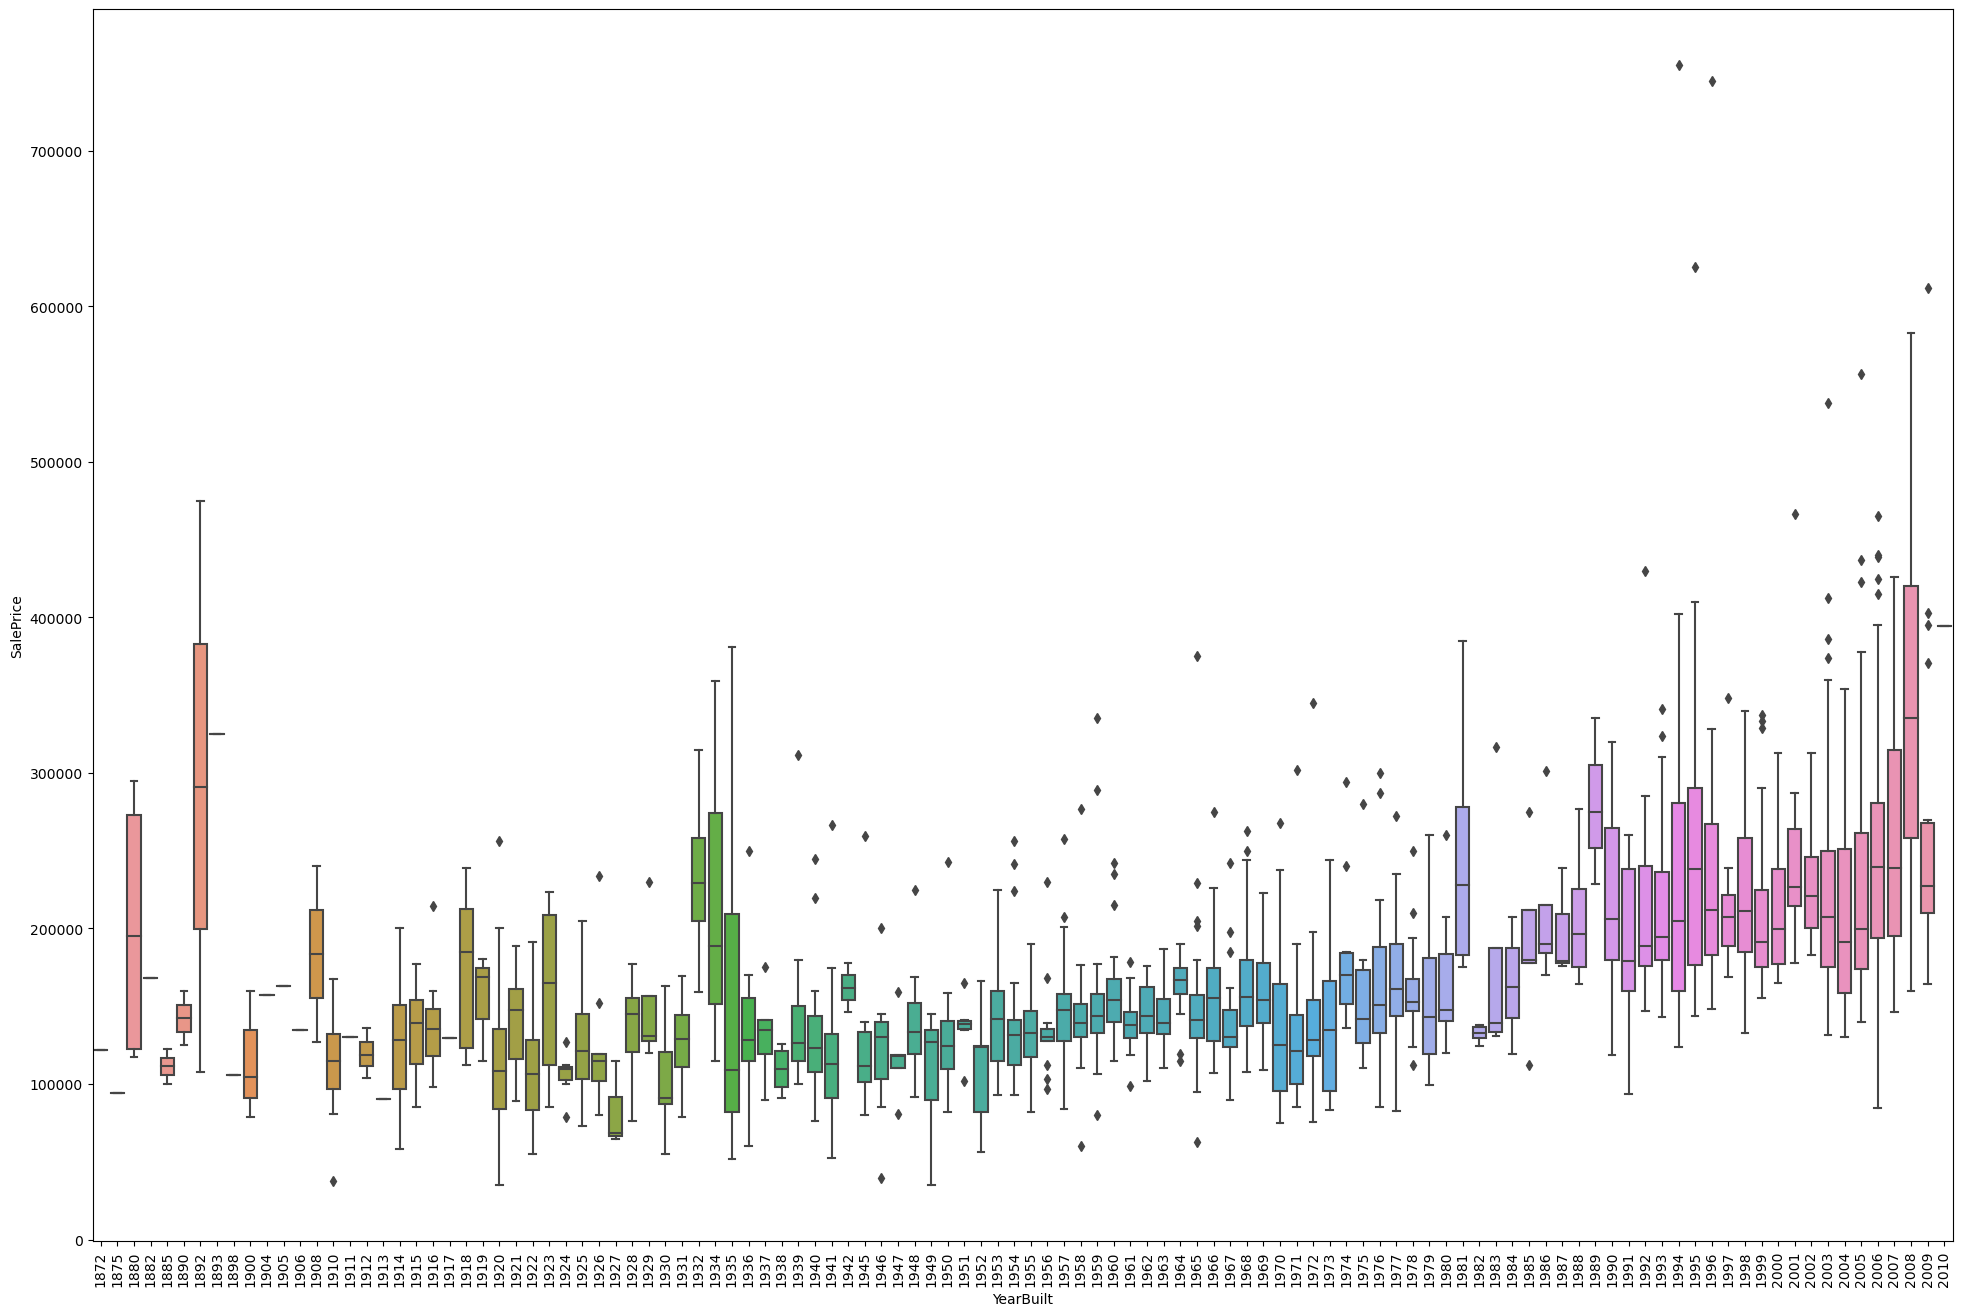

In [202]:
plt.figure(figsize=(24, 16))
sns.boxplot(x = 'YearBuilt', y = 'SalePrice', data = housedata)
plt.xticks(rotation=90);
plt.show()

### Handling Data Types

In [203]:
#Handling Data Types
datatypes = housedata.dtypes 
datatypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 79, dtype: object

In [204]:
#numerical and categorical values 
num_values = datatypes[(datatypes == 'int64') | (datatypes == float)]
cat_values = datatypes[datatypes == object] 

In [205]:
print(num_values.index)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [206]:
print(cat_values.index)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')


## Step 5: Data Preparation

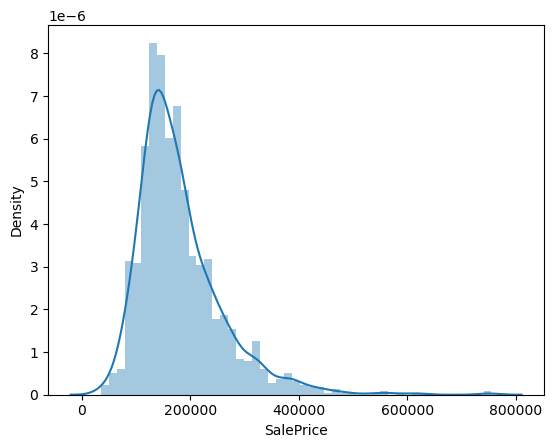

In [207]:
sns.distplot(housedata["SalePrice"])
plt.show()

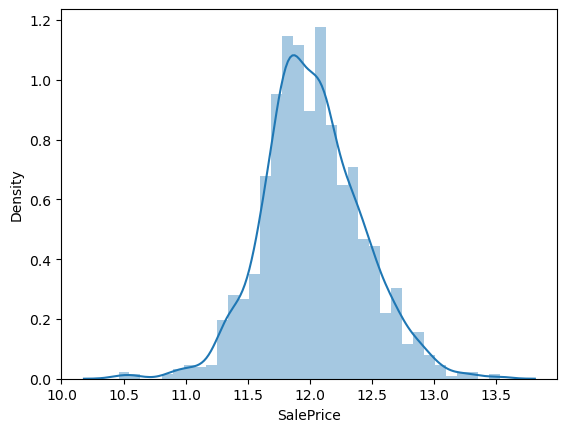

In [208]:
sns.distplot(np.log(housedata["SalePrice"]))
plt.show()

In [209]:
housedata["SalePrice"] = np.log(housedata["SalePrice"])

In [210]:
housedata["SalePrice"]

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

### Creating Dummy Variables

In [211]:
#Create dummy variable for categorical values
housedata_cat = housedata[cat_values.index]
housedata_cat_dummies = pd.get_dummies(housedata_cat, drop_first=True)

In [212]:
#concatenate dummy data with the earlier dataframe
housedata = pd.concat([housedata, housedata_cat_dummies],axis=1)

In [213]:
housedata.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,False,False,False,False,True,False,False,False,True,False
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,False,False,False,False,True,False,False,False,True,False
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,False,False,False,False,True,False,False,False,True,False
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,False,False,False,False,True,False,False,False,False,False
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,False,False,False,False,True,False,False,False,True,False


In [214]:
#remove unwanted columns
housedata.drop(housedata_cat.columns, axis=1, inplace=True) 

In [215]:
housedata.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,False,False,False,False,True,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,False,False,False,False,True,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,False,False,False,False,True,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,False,False,False,False,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,False,False,False,False,True,False,False,False,True,False


#### Observation

- Dummy variables are created correctly.

### Splitting the data into Train and Test Sets

In [216]:
#Split the data into training and testing set
df_train, df_test = train_test_split(housedata, train_size=0.7, test_size=0.3, random_state=100)

In [217]:
print(df_train.shape)
print(df_test.shape)

(1021, 257)
(438, 257)


### Feature Scaling

In [218]:
#Rescaling the features
scaler = MinMaxScaler()
#apply scaler to variables other than binary values(0 and 1) and dummy variables
housedata_num = housedata[num_values.index]
listtoscale =housedata_num.columns

df_train[listtoscale] = scaler.fit_transform(df_train[listtoscale])
df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,0.058824,0.157534,0.019306,0.444444,0.625,0.384058,0.000000,0.00,0.082920,0.0,...,False,False,False,False,True,False,False,False,True,False
318,0.235294,0.236301,0.039403,0.666667,0.500,0.876812,0.716667,0.16,0.174876,0.0,...,False,False,False,False,True,False,False,False,True,False
239,0.176471,0.106164,0.033981,0.555556,0.375,0.528986,0.000000,0.00,0.016655,0.0,...,False,False,False,False,True,False,False,False,True,False
986,0.176471,0.130137,0.017931,0.555556,0.875,0.275362,0.883333,0.00,0.000000,0.0,...,False,False,False,False,True,False,False,False,True,False
1416,1.000000,0.133562,0.046139,0.333333,0.625,0.094203,0.000000,0.00,0.000000,0.0,...,False,False,False,False,True,False,False,False,True,False


In [219]:
#Scale Test Data
df_test[listtoscale] = scaler.transform(df_test[listtoscale])
df_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,0.000000,0.133562,0.035192,0.333333,0.625,0.717391,0.350000,0.00000,0.109142,0.0,...,False,False,False,False,True,False,False,False,True,False
57,0.235294,0.232877,0.047566,0.666667,0.500,0.956522,0.900000,0.00000,0.000000,0.0,...,False,False,False,False,True,False,False,False,True,False
780,0.000000,0.143836,0.029930,0.666667,0.500,0.891304,0.766667,0.02375,0.000000,0.0,...,False,False,False,False,True,False,False,False,True,False
382,0.235294,0.198630,0.036338,0.666667,0.500,0.971014,0.933333,0.00000,0.000000,0.0,...,False,False,False,False,True,False,False,False,True,False
1170,0.352941,0.188356,0.039309,0.555556,0.625,0.760870,0.450000,0.00000,0.092488,0.0,...,False,False,False,False,True,False,False,False,True,False


## Step 6: Building Model

### Dividing into X and Y sets for the model building

In [220]:
#Training data
X_train = df_train.drop("SalePrice", axis=1)
y_train = df_train["SalePrice"]

In [221]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,0.058824,0.157534,0.019306,0.444444,0.625,0.384058,0.000000,0.00,0.082920,0.0,...,False,False,False,False,True,False,False,False,True,False
318,0.235294,0.236301,0.039403,0.666667,0.500,0.876812,0.716667,0.16,0.174876,0.0,...,False,False,False,False,True,False,False,False,True,False
239,0.176471,0.106164,0.033981,0.555556,0.375,0.528986,0.000000,0.00,0.016655,0.0,...,False,False,False,False,True,False,False,False,True,False
986,0.176471,0.130137,0.017931,0.555556,0.875,0.275362,0.883333,0.00,0.000000,0.0,...,False,False,False,False,True,False,False,False,True,False
1416,1.000000,0.133562,0.046139,0.333333,0.625,0.094203,0.000000,0.00,0.000000,0.0,...,False,False,False,False,True,False,False,False,True,False


In [222]:
y_train.head()

210     0.335850
318     0.653235
239     0.382177
986     0.393493
1416    0.408435
Name: SalePrice, dtype: float64

In [223]:
#Test data
X_test = df_test.drop("SalePrice", axis=1)
y_test = df_test["SalePrice"]

In [224]:
X_test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,0.000000,0.133562,0.035192,0.333333,0.625,0.717391,0.350000,0.00000,0.109142,0.000000,...,False,False,False,False,True,False,False,False,True,False
57,0.235294,0.232877,0.047566,0.666667,0.500,0.956522,0.900000,0.00000,0.000000,0.000000,...,False,False,False,False,True,False,False,False,True,False
780,0.000000,0.143836,0.029930,0.666667,0.500,0.891304,0.766667,0.02375,0.000000,0.000000,...,False,False,False,False,True,False,False,False,True,False
382,0.235294,0.198630,0.036338,0.666667,0.500,0.971014,0.933333,0.00000,0.000000,0.000000,...,False,False,False,False,True,False,False,False,True,False
1170,0.352941,0.188356,0.039309,0.555556,0.625,0.760870,0.450000,0.00000,0.092488,0.000000,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,0.000000,0.202055,0.037999,0.444444,0.625,0.630435,0.150000,0.08250,0.175585,0.000000,...,False,False,False,False,True,False,False,False,True,False
555,0.147059,0.126712,0.022936,0.444444,0.625,0.362319,0.000000,0.00000,0.000000,0.000000,...,False,False,False,False,True,False,False,False,True,False
399,0.235294,0.150685,0.031099,0.666667,0.500,0.971014,0.950000,0.06250,0.143870,0.000000,...,False,False,False,False,True,False,False,False,True,False
545,0.176471,0.164384,0.057820,0.666667,0.500,0.840580,0.633333,0.11125,0.177534,0.137042,...,False,False,False,False,True,False,False,False,True,False


In [225]:
y_test

1436    0.403081
57      0.562149
780     0.526310
382     0.589139
1170    0.516935
          ...   
509     0.413703
555     0.382177
399     0.628551
545     0.611937
266     0.542532
Name: SalePrice, Length: 438, dtype: float64

## Apply Lasso Regression

In [226]:
# list of alphas to tune
params = {'alpha': [0.00001, 0.000025, 0.000050, 0.0001, 0.00025, 0.00050, 0.001, 0.0025, 0.0050, 0.01 ]}

In [227]:
# Applying Lasso Regression
lasso = Lasso()

# Applying cross validation technique due to less sample size for training data
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 2.5e-05, 5e-05, 0.0001, 0.00025,
                                   0.0005, 0.001, 0.0025, 0.005, 0.01]},
             return_train_score=True, scoring='r2', verbose=1)

In [228]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.188257,0.008005,0.002435,0.000846,0.00001,{'alpha': 1e-05},0.894325,0.669140,0.820620,0.915077,...,0.846684,0.096765,6,0.964231,0.962705,0.961442,0.960566,0.959355,0.961660,0.001689
1,0.171735,0.015466,0.001835,0.000498,0.000025,{'alpha': 2.5e-05},0.900840,0.694373,0.830187,0.919885,...,0.856959,0.089276,5,0.961916,0.960451,0.959355,0.958838,0.956424,0.959397,0.001823
2,0.105035,0.025999,0.002682,0.001291,0.00005,{'alpha': 5e-05},0.907105,0.714531,0.834549,0.923125,...,0.863860,0.082869,4,0.957982,0.957155,0.955649,0.955255,0.952020,0.955612,0.002051
3,0.050067,0.011292,0.001881,0.000832,0.0001,{'alpha': 0.0001},0.909707,0.738028,0.834356,0.922407,...,0.867098,0.073059,2,0.949729,0.950742,0.948928,0.947488,0.943025,0.947983,0.002697
4,0.020925,0.005821,0.002750,0.000798,0.00025,{'alpha': 0.00025},0.903181,0.779958,0.842583,0.917493,...,0.870996,0.052830,1,0.925635,0.933086,0.934141,0.924225,0.920334,0.927484,0.005308
5,0.013257,0.002078,0.001735,0.000712,0.0005,{'alpha': 0.0005},0.891054,0.809229,0.842036,0.906266,...,0.865889,0.035403,3,0.890424,0.907901,0.904172,0.887026,0.885044,0.894913,0.009319
6,0.011815,0.002359,0.002337,0.000826,0.001,{'alpha': 0.001},0.879641,0.806037,0.820850,0.876219,...,0.845986,0.029243,7,0.862666,0.878782,0.873634,0.858309,0.857924,0.866263,0.008447
7,0.010509,0.002663,0.002080,0.001027,0.0025,{'alpha': 0.0025},0.831010,0.769290,0.772406,0.817212,...,0.792383,0.026292,8,0.796194,0.812358,0.808695,0.799203,0.796772,0.802644,0.006616
8,0.014442,0.002706,0.002535,0.001184,0.005,{'alpha': 0.005},0.727594,0.675056,0.672341,0.715591,...,0.687083,0.030335,9,0.691136,0.700024,0.703561,0.695301,0.688013,0.695607,0.005666
9,0.009475,0.002357,0.002535,0.001205,0.01,{'alpha': 0.01},0.585480,0.545616,0.534610,0.575526,...,0.551901,0.025120,10,0.546216,0.560477,0.559487,0.556828,0.565606,0.557723,0.006420


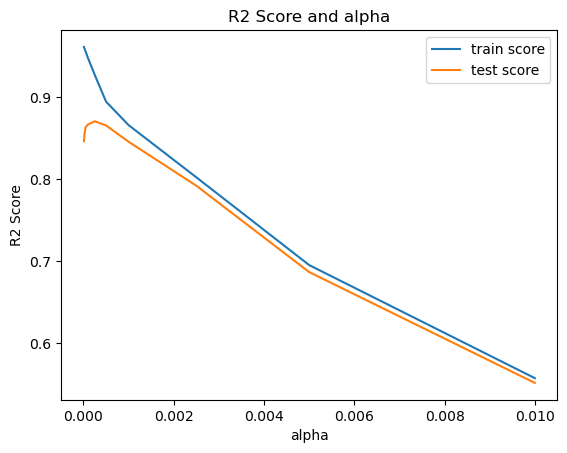

In [229]:
# plotting mean test and train scores with alpha 
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])


plt.xlabel('alpha')
plt.ylabel('R2 Score')

plt.title("R2 Score and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()


In [230]:
#Finding best alpha value for tuning the model
lasso_model_cv.best_params_

{'alpha': 0.00025}

In [231]:
lasso_model_cv.best_score_

0.8709957634342504

In [232]:
#Apply optimal alpha value to fit the model
alpha=0.00025
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 


Lasso(alpha=0.00025)

In [233]:
#printing coefficient values of features in lasso model
lasso.coef_

array([-2.74441773e-02,  0.00000000e+00,  0.00000000e+00,  1.74758135e-01,
        7.80119237e-02,  3.68065240e-02,  2.43909166e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.52467375e-02,
        2.23817189e-02,  0.00000000e+00, -0.00000000e+00,  3.55555847e-01,
        4.79341552e-02,  0.00000000e+00,  2.26656395e-02,  7.29791411e-03,
        0.00000000e+00, -0.00000000e+00,  3.52456210e-02,  0.00000000e+00,
        0.00000000e+00,  5.44292241e-02,  2.11548785e-02,  2.02226035e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  7.94777422e-03,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -4.02747707e-03,
        5.00458243e-03,  1.96496066e-04,  1.96234744e-02, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.71577495e-03,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  6.62649434e-03,
        3.22981149e-03, -0.00000000e+00,  1.38985454e-02, -3.96236286e-05,
       -0.00000000e+00, -

#### Observation

- There are many features which have 0 coefficient means lasso has eliminated these features.
- The optimal values of lambda with Lasso regression is 0.00025

## Apply Ridge Regression

In [234]:
#List of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [235]:
# Applying Ridge
ridge = Ridge()

# Applying cross validation technique due to less sample size for training data
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [236]:
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.021334,0.030382,0.003700,0.001290,0.0001,{'alpha': 0.0001},0.888264,0.656403,0.801049,0.898783,...,0.833533,0.097691,24,0.965052,0.963582,0.962379,0.961336,0.960292,0.962528,0.001669
1,0.006712,0.002305,0.001949,0.000635,0.001,{'alpha': 0.001},0.888427,0.656814,0.801443,0.898725,...,0.833731,0.097541,23,0.965049,0.963581,0.962379,0.961317,0.960284,0.962522,0.001673
2,0.006852,0.002910,0.002690,0.001636,0.01,{'alpha': 0.01},0.888744,0.659937,0.804734,0.900851,...,0.835730,0.096720,22,0.964994,0.963544,0.962346,0.961252,0.960218,0.962471,0.001679
3,0.004426,0.000587,0.002256,0.000882,0.05,{'alpha': 0.05},0.889047,0.670313,0.813707,0.906285,...,0.841265,0.093638,21,0.964275,0.963242,0.961829,0.960631,0.959371,0.961870,0.001758
4,0.006212,0.001725,0.002129,0.001300,0.1,{'alpha': 0.1},0.888862,0.680823,0.819962,0.909057,...,0.845140,0.089813,20,0.962915,0.962691,0.960841,0.959368,0.957798,0.960723,0.001954
5,0.007674,0.004957,0.002538,0.001260,0.2,{'alpha': 0.2},0.888381,0.697302,0.826614,0.910488,...,0.849378,0.083048,19,0.959977,0.961417,0.958696,0.956504,0.954518,0.958222,0.002457
6,0.006294,0.001390,0.002342,0.001289,0.3,{'alpha': 0.3},0.888100,0.709850,0.830144,0.910311,...,0.851834,0.077609,18,0.957275,0.960113,0.956711,0.953810,0.951610,0.955904,0.002935
7,0.005739,0.001105,0.002657,0.000973,0.4,{'alpha': 0.4},0.888014,0.719805,0.832316,0.909759,...,0.853535,0.073227,16,0.954902,0.958858,0.954953,0.951425,0.949122,0.953852,0.003336
8,0.006949,0.001921,0.002271,0.001141,0.5,{'alpha': 0.5},0.888068,0.727939,0.833773,0.909153,...,0.854830,0.069638,15,0.952824,0.957675,0.953403,0.949333,0.946987,0.952044,0.003663
9,0.008202,0.003371,0.001851,0.000676,0.6,{'alpha': 0.6},0.888219,0.734738,0.834809,0.908589,...,0.855874,0.066645,14,0.950989,0.956568,0.952025,0.947487,0.945135,0.950441,0.003930


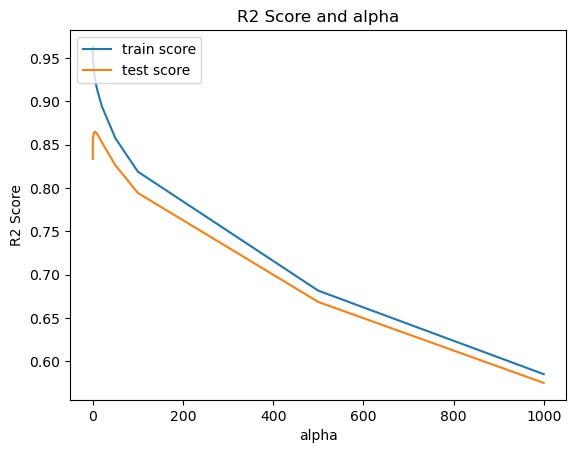

In [237]:
# plotting mean test and train scoes with alpha 
ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [238]:
#Finding optimal value of alpha
ridge_model_cv.best_params_

{'alpha': 5.0}

In [239]:
ridge_model_cv.best_score_

0.8645880058165798

In [240]:
#Apply optimal value of alpha to fit the model
alpha=5.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=5.0)

In [241]:
#printing coefficient values of features in ridge model
ridge.coef_

array([-2.22292413e-02, -8.13808850e-05,  2.75059779e-02,  1.02219781e-01,
        5.82026448e-02,  1.57750070e-02,  2.80303537e-02,  9.69626875e-03,
        2.19917005e-02,  1.41442203e-02,  2.62605345e-02,  3.37666689e-02,
        6.80244313e-02,  5.39577802e-02,  2.61595310e-03,  7.81390421e-02,
        3.93332263e-02,  4.17568588e-04,  4.54458077e-02,  1.80560690e-02,
        3.23582740e-02, -1.54471467e-02,  5.99548595e-02,  1.19039719e-02,
       -4.46062134e-03,  4.58389702e-02,  3.69741772e-02,  2.71323644e-02,
        6.90466626e-03,  1.22343175e-02,  1.69671280e-02,  1.58029202e-02,
       -7.55276627e-03, -3.89220934e-04,  6.18492910e-05, -5.85998437e-03,
        2.49409502e-02,  2.62380525e-02,  3.35137423e-02,  2.25771369e-02,
        3.95722186e-03,  1.26911853e-03,  1.38965690e-02,  8.06018999e-03,
       -1.37261813e-02,  6.17031939e-04,  1.40317925e-02,  1.78723107e-02,
        1.68703137e-02, -7.87333913e-03,  1.40609646e-02, -1.66398213e-02,
       -4.55682027e-03, -

#### Observation

- The optimal values of lambda with Ridge regression is 5.0

## Step 7: Model Evaluation

### Check Lasso Model Evaluation

#### Model evaluation on training data

In [242]:
y_train_pred = lasso.predict(X_train)
metrics.r2_score(y_train, y_train_pred)

0.9204153676136865

#### Model evaluation on test data

In [243]:
y_test_pred = lasso.predict(X_test)
metrics.r2_score(y_test, y_test_pred)

0.8564388664738716

#### Observation

- R2 score on training set is 92.04% and R2 score on testing set is 85.64% which is good.

### Check Ridge Model Evaluation

#### Model evaluation on training data

In [244]:
y_train_pred = ridge.predict(X_train)

In [245]:
metrics.r2_score(y_train, y_train_pred)

0.9228844090109122

#### Model evaluation on test data

In [246]:
y_test_pred = ridge.predict(X_test)

In [247]:
metrics.r2_score(y_test, y_test_pred)

0.8818219637395185

#### Observation

- R2 score on training set is 92.28% and R2 score on testing set is 88.18% which is good.

## Choosing the best model

In [248]:
coef_df = pd.DataFrame(index=X_train.columns)
coef_df.rows = X_train.columns
coef_df['Ridge'] = ridge.coef_
coef_df['Lasso'] = lasso.coef_
coef_df['abs_value_coeff']= abs (coef_df['Lasso'])
sorted_coef_df = coef_df.sort_values('abs_value_coeff', ascending=False)
print(sorted_coef_df)

                        Ridge     Lasso  abs_value_coeff
GrLivArea            0.078139  0.355556         0.355556
PoolQC_Gd           -0.061048 -0.276298         0.276298
OverallQual          0.102220  0.174758         0.174758
Condition2_PosN     -0.047364 -0.132557         0.132557
OverallCond          0.058203  0.078012         0.078012
...                       ...       ...              ...
Exterior1st_ImStucc  0.001926  0.000000         0.000000
Exterior1st_MetalSd  0.001601  0.000000         0.000000
Exterior1st_Plywood  0.007001  0.000000         0.000000
Exterior1st_Stone    0.008475  0.000000         0.000000
Exterior1st_Stucco  -0.001989 -0.000000         0.000000

[256 rows x 3 columns]


#### Check features eliminated by Lasso

In [249]:
FeaturesEliminated = coef_df[coef_df['abs_value_coeff'] == 0].index.tolist()

In [250]:
FeaturesEliminated

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtHalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageYrBlt',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'MSZoning_RM',
 'Street_Pave',
 'Alley_None',
 'Alley_Pave',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_HLS',
 'Utilities_NoSeWa',
 'LotConfig_FR3',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_CollgCr',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_SWISU',
 'Neighborhood_SawyerW',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'Condition1_Feedr',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAe',
 'Condition1_RRAn',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Condition2_Feedr',
 'Condition2_Norm',
 'Condition2_PosA',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRN

#### Observation

- The Lasso model achieved an R2 score of 92.04% on the training set and 85.64% on the testing set, indicating good performance on both datasets.
- The Ridge model achieved an R2 score of 92.28% on the training set and 88.18% on the testing set, also indicating good performance.
- Model evaluation results for both the Lasso and Ridge models are comparable on both the training and testing data, with the Ridge model performing slightly better.
- We evaluated the models based on 257 features. Since the Lasso model eliminates most of the features, we will select Lasso as the best model for its feature selection capability.


#### Final model slected is Lasso Regression with alpha 0.00025

#### Top 10 significant features in predicting the price of a house

In [251]:
sorted_coef_df.head(10)

,Ridge,Lasso,abs_value_coeff
GrLivArea,0.078139,0.355556,0.355556
PoolQC_Gd,-0.061048,-0.276298,0.276298
OverallQual,0.102220,0.174758,0.174758
Condition2_PosN,-0.047364,-0.132557,0.132557
OverallCond,0.058203,0.078012,0.078012
GarageCars,0.045839,0.054429,0.054429
BsmtFullBath,0.039333,0.047934,0.047934
Neighborhood_Crawfor,0.043400,0.038542,0.038542
YearBuilt,0.015775,0.036807,0.036807
TotRmsAbvGrd,0.059955,0.035246,0.035246


#### How well those variables describe the price of a house.

All non-zero features selected by Lasso are able to explain 89.6% of the variability in the observed data in the target variable. This is as seen during model evaluation based on R2 score.

In [252]:
sorted_coef_df

,Ridge,Lasso,abs_value_coeff
GrLivArea,0.078139,0.355556,0.355556
PoolQC_Gd,-0.061048,-0.276298,0.276298
OverallQual,0.102220,0.174758,0.174758
Condition2_PosN,-0.047364,-0.132557,0.132557
OverallCond,0.058203,0.078012,0.078012
...,...,...,...
Exterior1st_ImStucc,0.001926,0.000000,0.000000
Exterior1st_MetalSd,0.001601,0.000000,0.000000
Exterior1st_Plywood,0.007001,0.000000,0.000000
Exterior1st_Stone,0.008475,0.000000,0.000000
